In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
df2 = pd.read_json("./datasets/train.json")
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


# 1. Identify outliers for the "Bathrooms" field

On the renthop website, users are given the following options to select for features of their properties as shown below:

![image.png](https://media.discordapp.net/attachments/664927198523686912/674363960048353300/unknown.png?width=400&height=248)

For the number of bedrooms, selecting one of "Loft", "Room/Share" and "Studio" seems to set the number of bedrooms to 0 in our dataset. It is pre-processed by the company, so we make an assumption here. 

However, the number of bathrooms must be 1+ bath and not contain any decimal place according to their options.

Therefore, any listing that has the number of bathrooms equal to 0 is a faulty data and defined as an outlier.

In [3]:
new_df2 = df2.loc[df2['bathrooms'] > 0]
indexes = list(new_df2.index.values.tolist())
values = list(new_df2['bathrooms'][indexes])

# for index in indexes:
#     print(index, ",", df2['bathrooms'][index])

# #testing
# new_df2.loc[new_df2['bathrooms'] == 0.5]

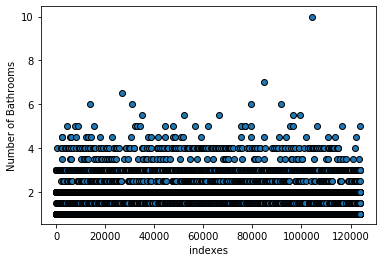

count    49039.000000
mean         1.219917
std          0.493546
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: bathrooms, dtype: float64

In [4]:
plt.scatter(indexes, new_df2['bathrooms'][indexes], edgecolor = 'black')
plt.xlabel('indexes')
plt.ylabel('Number of Bathrooms')
plt.show()
new_df2['bathrooms'].describe() # 49352 previously /w outliers

## 1) Is the one datapoint with 10 bathrooms an outlier?

In [5]:
new_df2[new_df2['bathrooms'] == 10].describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,1.0,1.0,1.0000,1.0,1.0000,1.0
mean,10.0,2.0,40.7633,6849204.0,-73.9849,3600.0
std,NaN,NaN,NaN,NaN,NaN,NaN
min,10.0,2.0,40.7633,6849204.0,-73.9849,3600.0
25%,10.0,2.0,40.7633,6849204.0,-73.9849,3600.0
50%,10.0,2.0,40.7633,6849204.0,-73.9849,3600.0
75%,10.0,2.0,40.7633,6849204.0,-73.9849,3600.0
max,10.0,2.0,40.7633,6849204.0,-73.9849,3600.0


In [6]:
new_df2[new_df2['bathrooms'] == 5].describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,20.0,20.000000,20.000000,2.000000e+01,20.000000,20.000000
mean,5.0,4.400000,38.723515,7.024429e+06,-70.273665,27214.700000
std,0.0,0.598243,9.114611,1.383369e+05,16.540716,16313.099522
min,5.0,4.000000,0.000000,6.812493e+06,-74.011300,9995.000000
25%,5.0,4.000000,40.751325,6.951518e+06,-73.976475,18624.250000
50%,5.0,4.000000,40.775950,7.036624e+06,-73.964600,26750.000000
75%,5.0,5.000000,40.777500,7.114054e+06,-73.963100,28500.000000
max,5.0,6.000000,40.786000,7.232801e+06,0.000000,85000.000000


It looks like the listing with "10 bathrooms" is a lot cheaper than the min of the listings with "5 bathrooms". It looks odd. 

In [7]:
new_df2 = df2.loc[ (df2['bathrooms'] > 0) & (df2['bathrooms'] != 10)]
indexes = list(new_df2.index.values.tolist())
values = list(new_df2['bathrooms'][indexes])

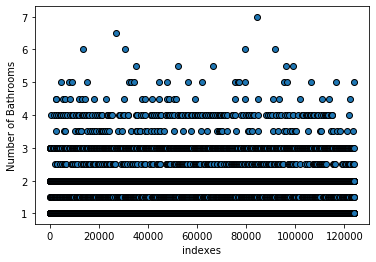

count    49038.000000
mean         1.219738
std          0.491956
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: bathrooms, dtype: float64

In [8]:
plt.scatter(indexes, new_df2['bathrooms'][indexes], edgecolor = 'black')
plt.xlabel('indexes')
plt.ylabel('Number of Bathrooms')
plt.show()
new_df2['bathrooms'].describe() # 49352 previously /w outliers

In [9]:
x = df2['bathrooms'].loc[(df2['bathrooms'] == 0) | (df2['bathrooms'] == 10)].count()
print("Number of outliers:", x)

Number of outliers: 314


## 2) Using Z-score

In [10]:
z = np.abs(stats.zscore(df2['bathrooms']))
threshold = 3
y = np.where(z>3)
print("Number of outliers:", y[0].size)

Number of outliers: 1035


# 2. Identify outliers for the "bedrooms" field

As discussed above, we assume that selecting any one of "Roft", "Room/Share" and "Studio" will set the number of bedrooms to 0. So, we keep any row that contains 0 bedroom. 

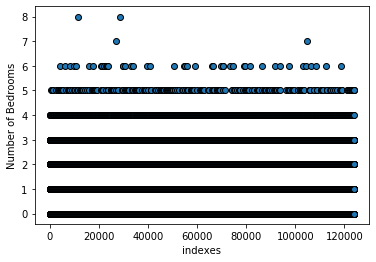

count    49352.000000
mean         1.541640
std          1.115018
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: bedrooms, dtype: float64

In [11]:
indexes = list(df2.index.values.tolist())
values = list(df2['bedrooms'][indexes])
    
plt.scatter(indexes, df2['bedrooms'][indexes], edgecolor = 'black')
plt.xlabel('indexes')
plt.ylabel('Number of Bedrooms')
plt.show()
df2['bedrooms'].describe()

# 1) Try different types of graph to see the distribution of values

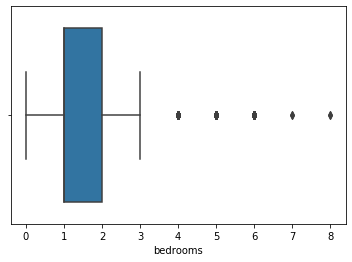

In [12]:
sns.boxplot(x=df2['bedrooms'])

As discussed earlier, we assume selecting any one of "Roft", "Room/Share" and "Studio" will set the number of bedrooms to 0. In the graph above, 0 is in the quartiles of our dataset which means 0 bedroom are valid data. 

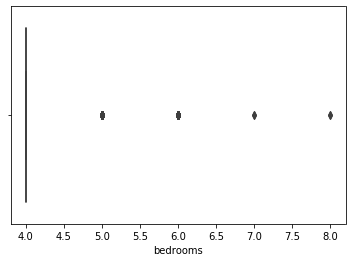

In [13]:
df3 = df2.loc[df2['bedrooms'] > 3]
sns.boxplot(x=df3['bedrooms'])
plt.show()

we can see most of our bedroom data entries lie between 1 and 2. Any other points above 3 may be outliers as they are no where near the quartiles. We investigated those points by ploting another graph to see their quartiles. It shows a single vertical line, which means they don't have relevance to each other. However, we don't know if they are meaningful - they are factual/valid data.

## 2) Compare prices

In [14]:
df2['price'].loc[df2['bedrooms'] > 3].describe()

count      2226.000000
mean       7446.745732
std        5977.921077
min        1025.000000
25%        5000.000000
50%        6000.000000
75%        7495.000000
max      100000.000000
Name: price, dtype: float64

In [15]:
df2['price'].loc[df2['bedrooms'] <= 3].describe()

count    4.712600e+04
mean     3.659345e+03
std      2.253029e+04
min      4.300000e+01
25%      2.470000e+03
50%      3.095000e+03
75%      3.961000e+03
max      4.490000e+06
Name: price, dtype: float64

The mean price of listings with the number of bedrooms above 3 is greater than the mean price of listings with the number of bedrooms below 3. This assures that all "bedrooms" values are reasonable, so we should keep all of our data.

In [16]:
print("Number of outliers:", 0)

Number of outliers: 0


## 2) Using Z-score

In [36]:
z = np.abs(stats.zscore(df2['bedrooms']))
threshold = 3
y = np.where(z>3)
print("Number of outliers:", y[0].size)

Number of outliers: 297


# 3. Identify outliers for the "building_id" field

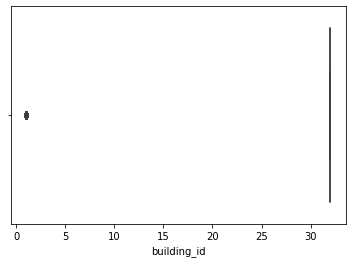

In [17]:
df2['building_id'].str.len()
sns.boxplot(x=df2['building_id'].str.len())

In [18]:
# print(df2['building_id'].count())
print("Number of outliers:",
df2['building_id'].loc[df2['building_id'].str.len() != 32].count())

# testing
# df2.loc[df2['building_id'].str.len() != 32]

Number of outliers: 8286


# 4. Identify outliers for the "created" field

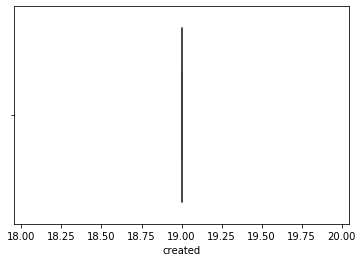

In [19]:
sns.boxplot(x=df2['created'].str.len())

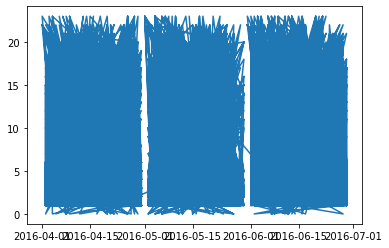

In [20]:
x = df2['created'].loc[df2['created'].str.len() == 19]
x['dates'] = pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S')
y = x['dates']
plt.plot(x['dates'].dt.date, x['dates'].dt.hour)

Performing the ourlier detection for 'created' attribute is not meaningful. As shown in two graphs above, all dates follow the same format and are of 19 characters in legnth. In addition to that, listings are distingushed by milisecond which means each listing will likely have its own timestamp differentiated by a millisecond. So there's not much meaning of 'created' attribute with respect to the objective of the project.

## 1) Identify outliers for other non-numeric attributes

In [21]:
df2['description']

4         Spacious 1 Bedroom 1 Bathroom in Williamsburg!...
6         BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...
9         **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...
10        A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
15        Over-sized Studio w abundant closets. Availabl...
                                ...                        
124000    There is 700 square feet of recently renovated...
124002    2 bedroom apartment with updated kitchen, rece...
124004    No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...
124008    Wonderful Bright Chelsea 2 Bedroom apartment o...
124009    ***PRIME MIDTOWN EAST OFF PARK AVE***TRUE 3 BE...
Name: description, Length: 49352, dtype: object

In [22]:
df2['display_address']

4          145 Borinquen Place
6                    East 44th
9             East 56th Street
10         Metropolitan Avenue
15            East 34th Street
                  ...         
124000            W 171 Street
124002                Broadway
124004    210 Brighton 15th St
124008        West 21st Street
124009               E 54th St
Name: display_address, Length: 49352, dtype: object

In [23]:
df2['features']

4         [Dining Room, Pre-War, Laundry in Building, Di...
6         [Doorman, Elevator, Laundry in Building, Dishw...
9         [Doorman, Elevator, Laundry in Building, Laund...
10                                                       []
15        [Doorman, Elevator, Fitness Center, Laundry in...
                                ...                        
124000              [Elevator, Dishwasher, Hardwood Floors]
124002    [Common Outdoor Space, Cats Allowed, Dogs Allo...
124004    [Dining Room, Elevator, Pre-War, Laundry in Bu...
124008    [Pre-War, Laundry in Unit, Dishwasher, No Fee,...
124009    [Dining Room, Elevator, Laundry in Building, D...
Name: features, Length: 49352, dtype: object

In [24]:
df2['manager_id']

4         a10db4590843d78c784171a107bdacb4
6         955db33477af4f40004820b4aed804a0
9         c8b10a317b766204f08e613cef4ce7a0
10        5ba989232d0489da1b5f2c45f6688adc
15        2c3b41f588fbb5234d8a1e885a436cfa
                        ...               
124000    a61e21da3ba18c7a3d54cfdcc247e1f8
124002    8f90e5e10e8a2d7cf997f016d89230eb
124004    a10db4590843d78c784171a107bdacb4
124008    c3cd45f4381ac371507090e9ffabea80
124009    e90f2ded843cdb2efd65ef47d9fc8029
Name: manager_id, Length: 49352, dtype: object

In [25]:
df2['photos']

4         [https://photos.renthop.com/2/7170325_3bb5ac84...
6         [https://photos.renthop.com/2/7092344_7663c19a...
9         [https://photos.renthop.com/2/7158677_c897a134...
10        [https://photos.renthop.com/2/7211212_1ed4542e...
15        [https://photos.renthop.com/2/7225292_901f1984...
                                ...                        
124000    [https://photos.renthop.com/2/6824800_0682be16...
124002    [https://photos.renthop.com/2/6813268_1e6fcc32...
124004    [https://photos.renthop.com/2/6927093_93a52104...
124008    [https://photos.renthop.com/2/6892816_1a8d087a...
124009    [https://photos.renthop.com/2/6901023_02052d90...
Name: photos, Length: 49352, dtype: object

In [26]:
df2['street_address']

4             145 Borinquen Place
6                   230 East 44th
9            405 East 56th Street
10        792 Metropolitan Avenue
15           340 East 34th Street
                   ...           
124000           620 W 171 Street
124002              3333 Broadway
124004       210 Brighton 15th St
124008       350 West 21st Street
124009              123 E 54th St
Name: street_address, Length: 49352, dtype: object

In [27]:
df2['interest_level']

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 49352, dtype: object

Non-numeric attributes in our dataset are all unique. There's no way to identify one as an outlier as every single one of them has unique values. Even if 'interest_level' has only 3 categories, there's no way to tell any one of those categories is an outlier. There's no boundary among different values.

# 6. Identify outliers for the "latitude" field

Lat-long coorditates for cities in United States are in range: 
- Latitude from 19.50139 to 64.85694
- longitude from -161.75583 to -68.01197

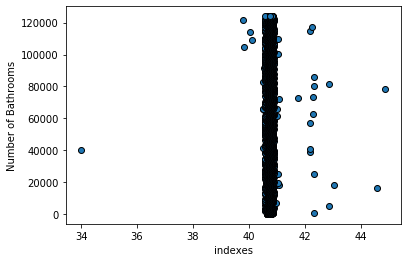

count    49340.000000
mean        40.751454
std          0.063417
min         34.012600
25%         40.728300
50%         40.751800
75%         40.774300
max         44.883500
Name: latitude, dtype: float64

In [28]:
x = df2['latitude'].loc[
    (df2['latitude'] >= 19.50139) & 
    (df2['latitude'] <= 64.85694)
    ]

indexes = list(x.index.values.tolist())
values = list(x[indexes])

plt.scatter(values,indexes, edgecolor = 'black')
plt.xlabel('indexes')
plt.ylabel('Number of Bathrooms')
plt.show()

x.describe()

Apart from one data point that is afar, other data points are difficult to identify as outliers. So, we can use z-score to find extreme outliers.

In [29]:
# Use Z-score to find outers
z = np.abs(stats.zscore(df2['latitude']))
threshold = 3
y = np.where(z>3)
print("Number of outliers:", y[0].size)

Number of outliers: 18


The resulted arry contains the list of row numbers that have a Z-score higher than 3, which are outliers

# 7. Identify outliers for the "longitude" field

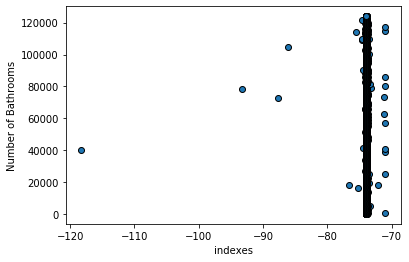

count    49340.000000
mean       -73.973702
std          0.239243
min       -118.271000
25%        -73.991700
50%        -73.977900
75%        -73.954800
max        -70.984600
Name: longitude, dtype: float64

In [30]:
x = df2['longitude'].loc[
    (df2['longitude'] >= -161.75583) & 
    (df2['longitude'] <= -68.01197)
    ]

indexes = list(x.index.values.tolist())
values = list(x[indexes])

plt.scatter(values,indexes, edgecolor = 'black')
plt.xlabel('indexes')
plt.ylabel('Number of Bathrooms')
plt.show()

x.describe()

In [31]:
z = np.abs(stats.zscore(df2['longitude']))
threshold = 3
y = np.where(z>3)
print("Number of outliers:", y[0].size)

Number of outliers: 16


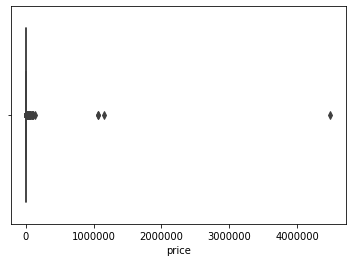

In [32]:
sns.boxplot(x=df2['price'])

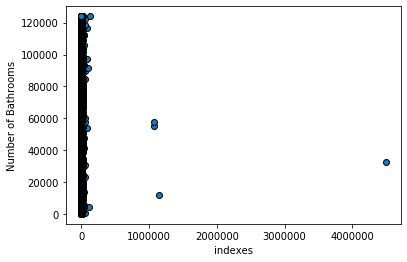

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

In [33]:
x = df2['price']
indexes = list(x.index.values.tolist())
values = list(x[indexes])

plt.scatter(values,indexes, edgecolor = 'black')
plt.xlabel('indexes')
plt.ylabel('Number of Bathrooms')
plt.show()

x.describe()

In [34]:
z = np.abs(stats.zscore(df2['price']))
threshold = 3
y = np.where(z>3)
print("Number of outliers:", y[0].size)

Number of outliers: 10


# 8. Identify outliers for the "listing_id" field

In [35]:
df2['listing_id']

4         7170325
6         7092344
9         7158677
10        7211212
15        7225292
           ...   
124000    6824800
124002    6813268
124004    6927093
124008    6892816
124009    6901023
Name: listing_id, Length: 49352, dtype: int64

Listing_id is also uniquely assigned for each listing. Therefore, outlier detection is meaningless for this attribute